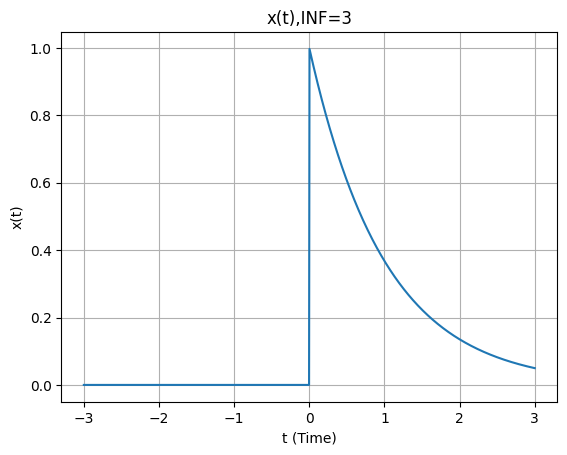

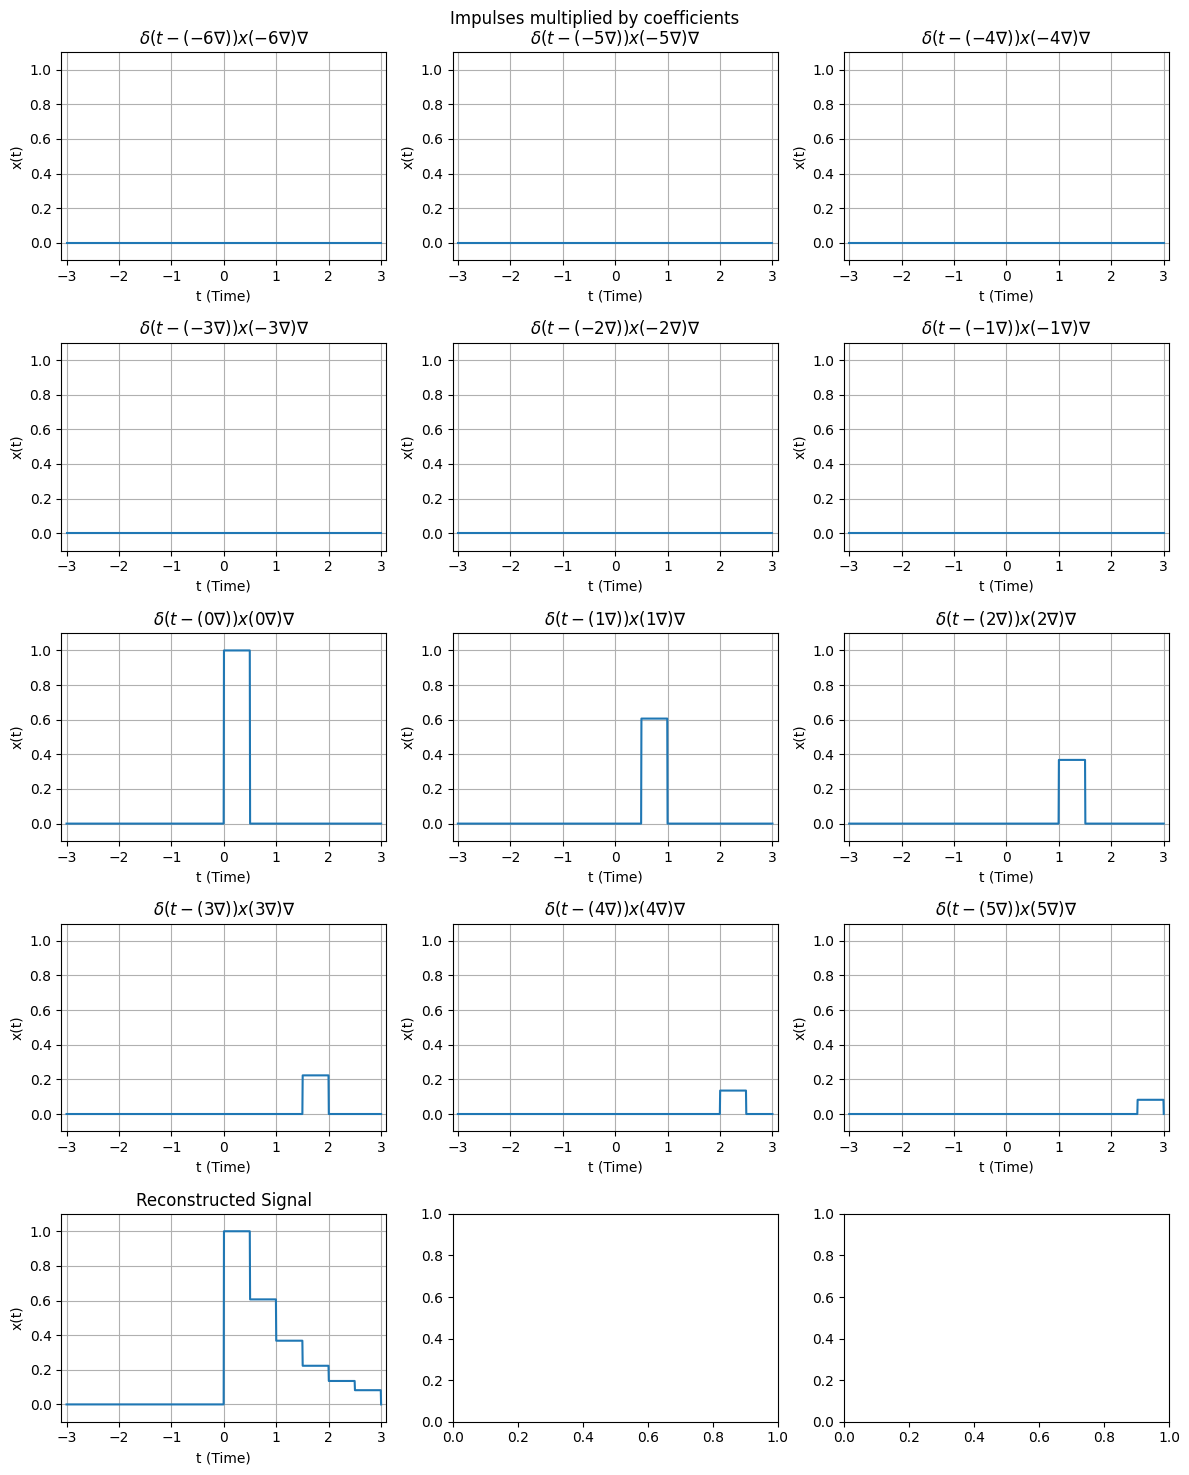

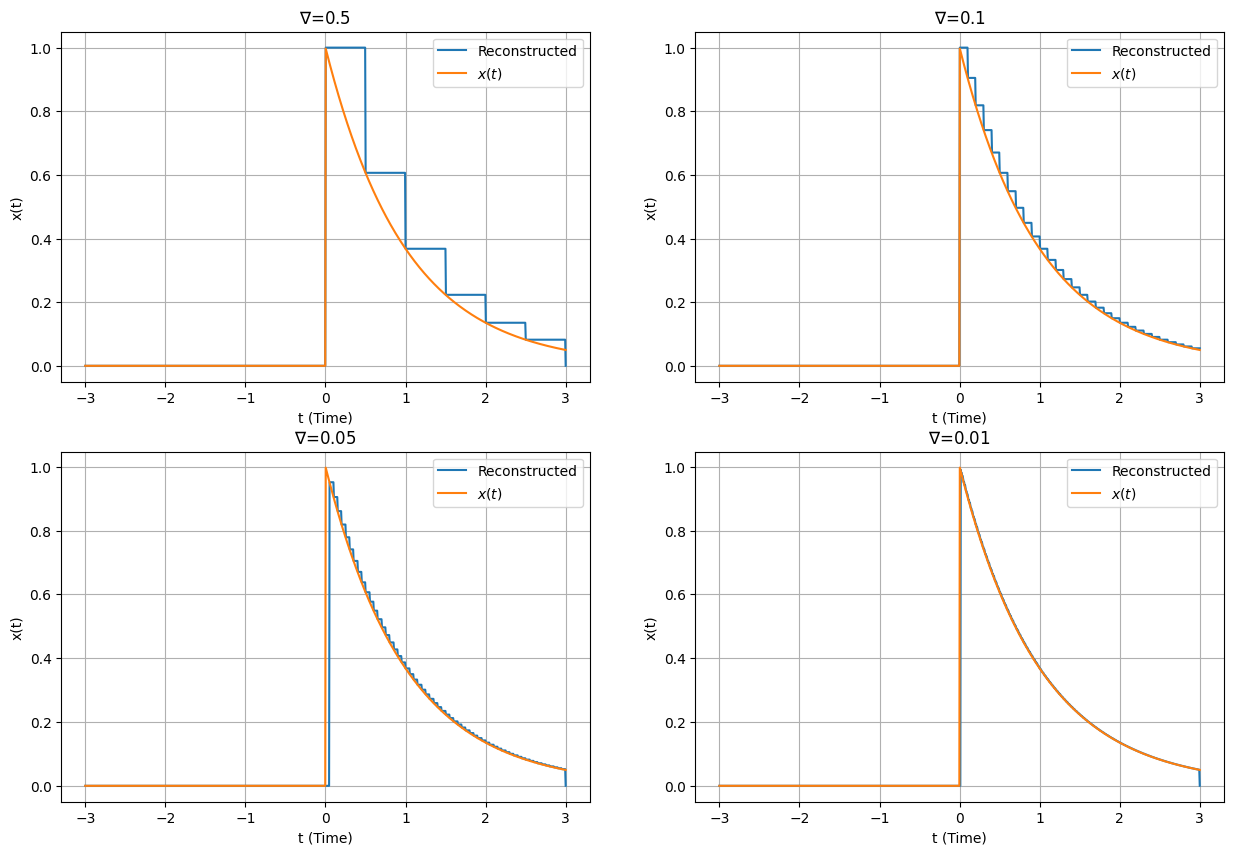

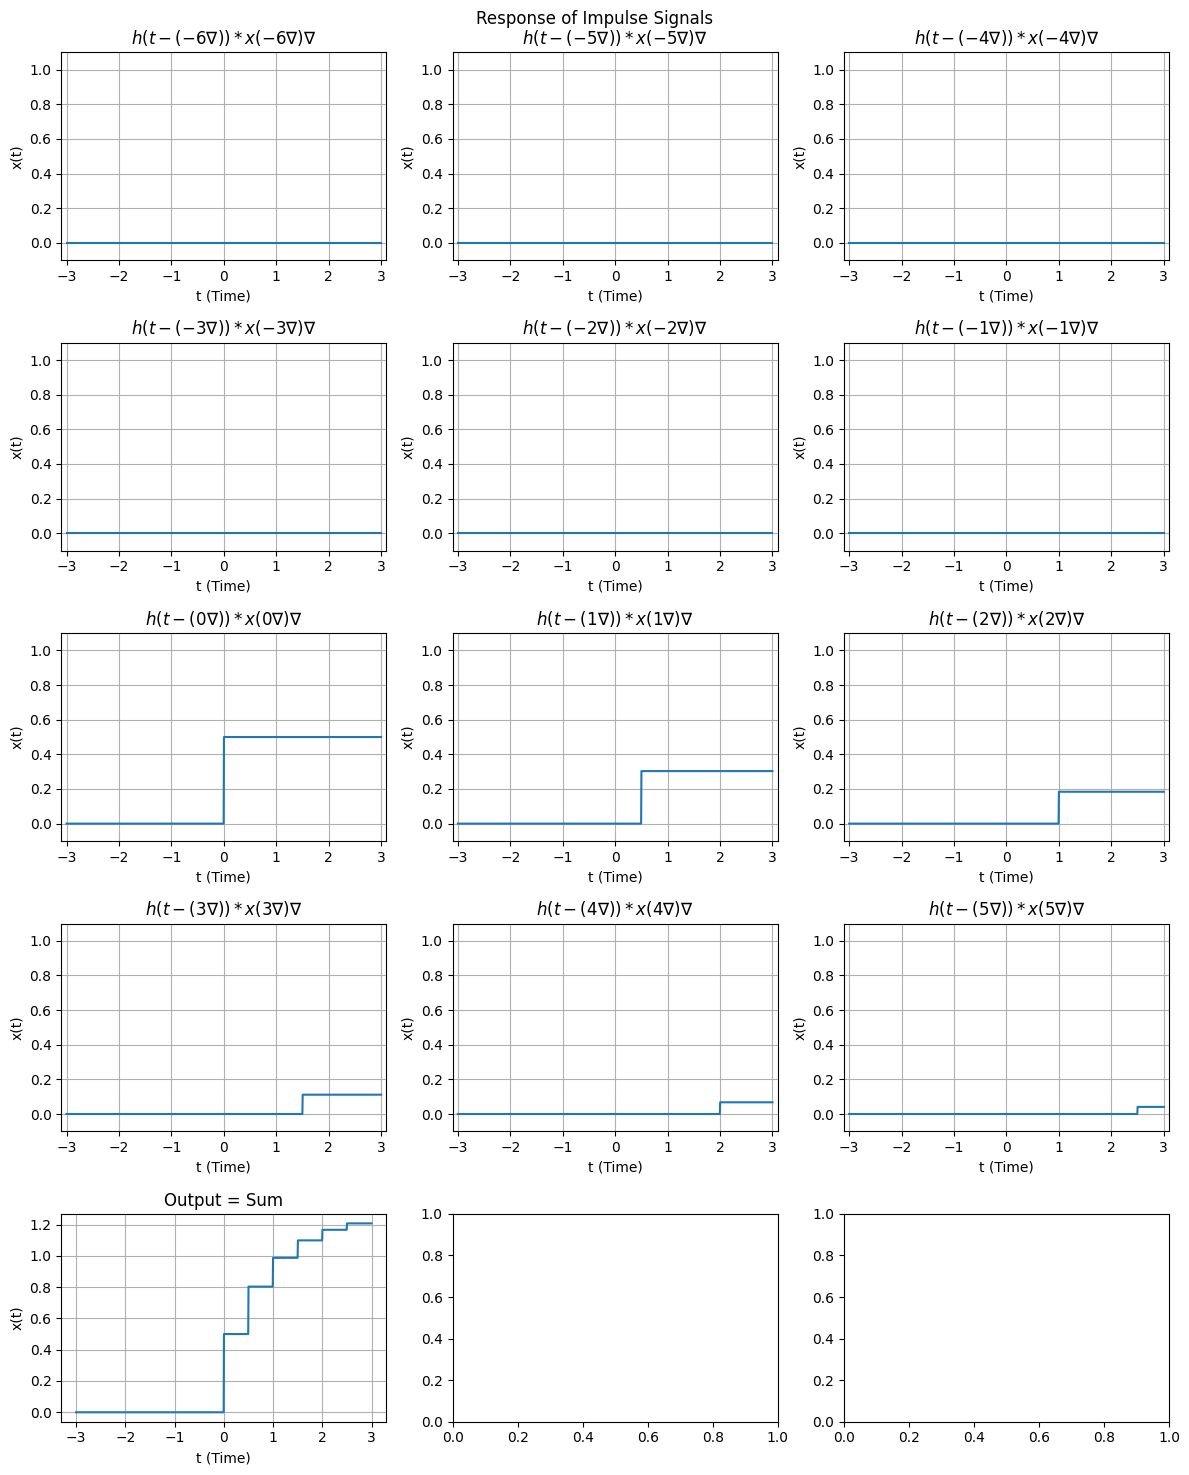

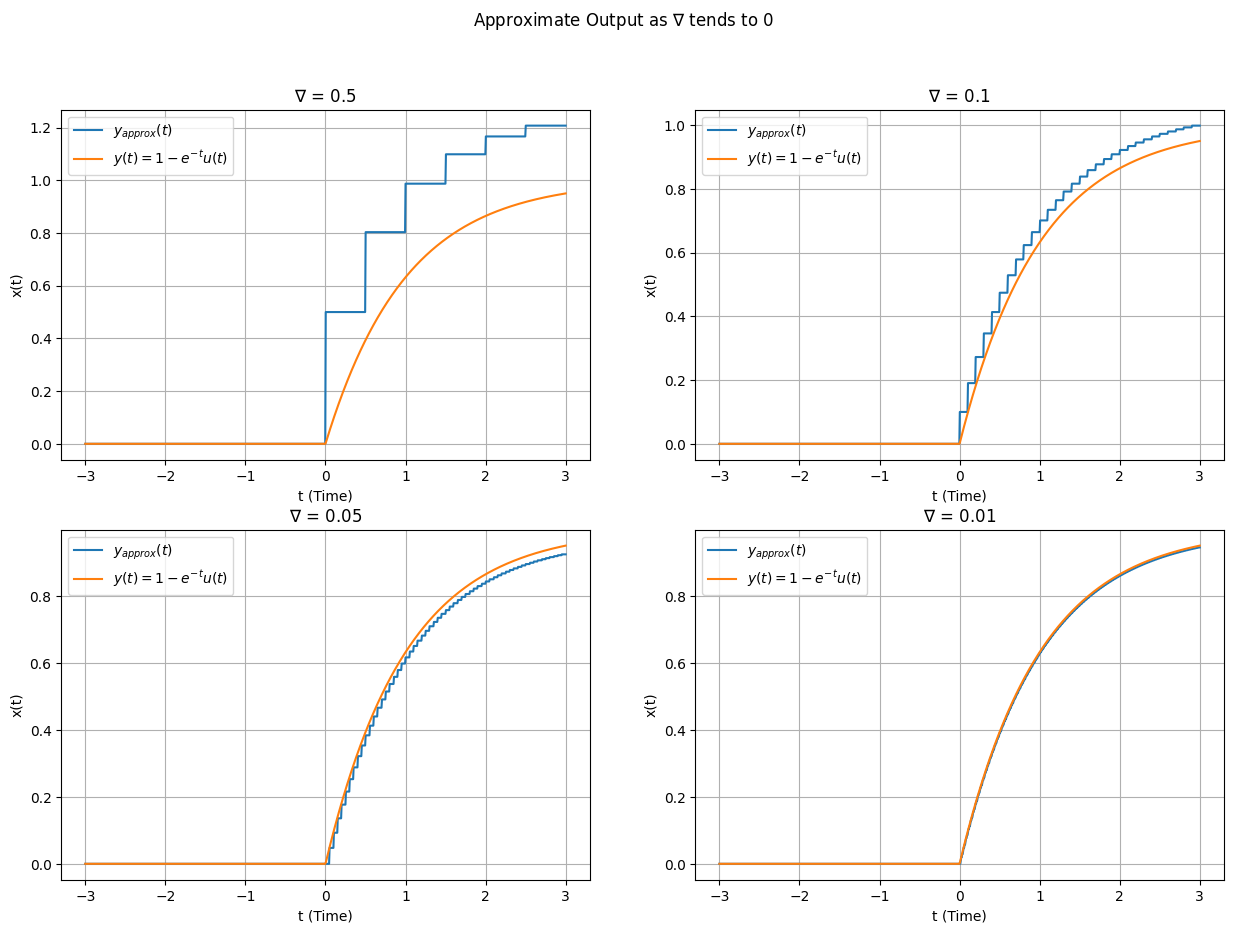

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousTimeSignal:
    def __init__(self,func):
        self.func = func
    def shift(self,shift):
        new_signal = lambda t:self.func(t-shift)
        return ContinuousTimeSignal(new_signal)
    def add(self,other):
        new_signal = lambda t:self.func(t)+other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply(self,other):
        new_signal = lambda t:self.func(t)*other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply_const_factor(self,scaler):
        new_signal = lambda t:self.func(t)*scaler
        return ContinuousTimeSignal(new_signal)
    # def plot(self, t_min, t_max,title="Continous Time Signal"):
    #     t = np.linspace(t_min, t_max, 1000)  # Generate time values
    #     y = self.func(t)  # Get the signal values over the time range
    #     plt.plot(t, y)
    #     plt.title(title)
    #     plt.xlabel('Time (t)')
    #     plt.ylabel('Signal value x(t)')
    #     plt.grid(True)
    #     plt.show()
    # def plot(self, t_min, t_max, title="Continuous Time Signal", other_signal=None, other_label="Other Signal",mainlabel=r"$y_{approx}(t)$"):
    #     t = np.linspace(t_min, t_max, 1000)  # Generate time values
    #     y = self.func(t)  # Get the signal values over the time range

    #     plt.plot(t, y, label=mainlabel)

    #     # If another signal is provided, plot it on the same graph
    #     if other_signal:
    #         other_y = other_signal.func(t)
    #         plt.plot(t, other_y, label=other_label)

    #     plt.title(title)
    #     plt.xlabel('t (Time)')
    #     plt.ylabel('x(t)')
    #     plt.grid(True)
    #     plt.legend()
    #     plt.show()
    def plot(self, t_min, t_max, title="Continuous Time Signal", other_signal=None, other_label="Other Signal", mainlabel=None, ax=None):
        
        t = np.linspace(t_min, t_max, 1000)
        y = self.func(t)

        if ax is None:
            ax = plt.gca()
        # ax.figure(dpi= 100)

        ax.plot(t, y, label=mainlabel)

        if other_signal:
            other_y = other_signal.func(t)
            ax.plot(t, other_y, label=other_label)

        ax.set_title(title)
        ax.set_xlabel('t (Time)')
        ax.set_ylabel('x(t)')
        ax.grid(True)
        if mainlabel:
            ax.legend()


class ContinuousLTI:
    def __init__(self,impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self,input_signal,delta):
        # Implementation needed
        impulses = []
        coefficients = []
        
        t_vals = np.arange(-3,3,delta)
        for t in t_vals:
            coefficient = input_signal.func(t)*delta
            # if(coefficient!=0):
            impulse = ContinuousTimeSignal(lambda x, t=t: self.impulse_response.func(x - t))
            # impulse = ContinuousTimeSignal(lambda t_, t0=t: np.where((t_ >= t0) & (t_ < t0 + delta), 1.0/delta, 0.0))
            impulses.append(impulse)
            coefficients.append(coefficient)
        return impulses,coefficients

    def output_approx(self,input_signal,delta):
        # Implementation needed
        impulses,coefficients = self.linear_combination_of_impulses(input_signal,delta)
        output_signal = ContinuousTimeSignal(lambda x:0)
        responses = []
        for i,impulse in enumerate(impulses):
            # shifted_impulse = self.impulse_response.shift(impulse)
            res = impulse.multiply_const_factor(coefficients[i])
            output_signal = output_signal.add(impulse.multiply_const_factor(coefficients[i]))
            responses.append(res)
        # output_signal.plot(t_min=-3, t_max=3, title="Output Signal")
        responses.append(output_signal)
        return output_signal,responses,delta
    
def reconstructed_input(input_signal, delta, isPlot = False):
    impulses = []
    coefficients = []
    t_vals = np.arange(-3, 3, delta)

    # if(delta == 0.5):
    #     print(t_vals)
    
    reconstructed_signal = ContinuousTimeSignal(lambda t: 0)
    
    intermediate_signals = []
    for i,t in enumerate(t_vals):
        coefficient = input_signal.func(t) * delta
        coefficients.append(coefficient)
        # if(delta == 0.5):
        #     print(coefficient)
        # print(t)

        imp = ContinuousTimeSignal(lambda t_, t0=t: np.where((t_ >= t0) & (t_ < t0 + delta), 1.0/delta, 0.0))
        rec_step =imp.multiply_const_factor(coefficient)
        reconstructed_signal = reconstructed_signal.add(imp.multiply_const_factor(coefficient))
        intermediate_signals.append(rec_step)
        # reconstructed_signal.plot(t_min=-3, t_max=3, title=f"Reconstructed Signal Step {i+1}", ax=axs[i])
        # print(i)
        # print(coefficients)
    # intermediate_signals.append(reconstructed_signal)
    if(isPlot):
        ln = len(t_vals)
        # print(ln)
        rows = (ln // 3) + 1
        cols = 3
        subplot_width = 4  # width for each subplot
        subplot_height = 3  # height for each subplot
        total_plots = ln-1
        start = -1*(total_plots//2+1)
        end = total_plots//2-1

        # Calculate overall figure size based on the number of rows and columns
        fig, axs = plt.subplots(rows, cols, figsize=(cols * subplot_width, rows * subplot_height))
        axs = axs.ravel()
        index = 0
        plt.suptitle("Impulses multiplied by coefficients")
        for i,rec in enumerate(intermediate_signals):
            rec.plot(t_min=-3, t_max=3, title=rf"$\delta(t-({start}\nabla))x({start}\nabla)\nabla$",ax = axs[i])
            axs[i].set_xlim(-3.1, 3.1)  # Set x-axis limit
            axs[i].set_ylim(-0.1, 1.1)   # Set y-axis limit
            start+=1
            index = i
        reconstructed_signal.plot(t_min=-3, t_max=3, title="Reconstructed Signal",ax = axs[index+1])
        axs[len(intermediate_signals)].set_xlim(-3.1, 3.1)  # Set x-axis limit
        axs[len(intermediate_signals)].set_ylim(-0.1, 1.1)   # Set y-axis limit

        plt.tight_layout()
        plt.show()
    return reconstructed_signal
def plot_response(response, delta, isPlot = False):
    ln = len(response)
    rows = (ln // 3) + 1
    cols = 3
    subplot_width = 4  # width for each subplot
    subplot_height = 3  # height for each subplot
    fig, axs = plt.subplots(rows, cols, figsize=(cols * subplot_width, rows * subplot_height))
    axs = axs.ravel()
    total_plots = ln-1
    start = -1*(total_plots//2)
    end = total_plots//2-1
    # print(start,end)
    plt.suptitle("Response of Impulse Signals")
    for i,rec in enumerate(response):
        if(start<=end):
            rec.plot(t_min=-3, t_max=3, title=rf"$h(t-({start}\nabla))*x({start}\nabla)\nabla$",ax = axs[i])
            axs[i].set_xlim(-3.1, 3.1)  # Set x-axis limit
            axs[i].set_ylim(-0.1, 1.1)   # Set y-axis limit
        else:
            rec.plot(t_min=-3, t_max=3, title=rf"Output = Sum",ax = axs[i])
            # axs[i].set_xlim(-3.1, 3.1)  # Set x-axis limit  
            # axs[i].set_ylim(-0.1, 1.1)
        start+=1
    
    plt.tight_layout()
    plt.show()

    return None
def main():
    # Define the impulse response h(t) = -2t + 4 when t < 2, 0 otherwise
    impulse_response = ContinuousTimeSignal(lambda t: 1 & (t>=0))

    input_signal = ContinuousTimeSignal(lambda t: np.exp(-t) * (t >= 0))

    input_signal.plot(t_min=-3, t_max=3, title="x(t),INF=3")
    # impulse_response.plot(t_min=-3, t_max=3, title="Impulse Response h(t)")

    # print("Impulse Response h(t):")
    # impulse_response.plot(t_min=-3, t_max=3, title="Impulse Response h(t)")

    # print("Input Signal x(t):")
    # input_signal.plot(t_min=-3, t_max=3, title="Input Signal x(t)")
    

    lti_system = ContinuousLTI(impulse_response)

    # reconstructed_input(input_signal, delta=0.05)



    reconstructed_signals = []
    deltas = [0.5, 0.1, 0.05, 0.01]
    # final_reconstructed_signals = []
    for delta in deltas:
        if delta == 0.5:
            output_signal = reconstructed_input(input_signal, delta,True)
        else:
            output_signal = reconstructed_input(input_signal, delta)
        # final_reconstructed_signals.append(output_signal[-1])
        reconstructed_signals.append(output_signal)
    # print(len(final_reconstructed_signals))
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.ravel()
    for i,rec in enumerate(reconstructed_signals):
        rec.plot(t_min=-3, t_max=3, title=rf"$\nabla$={deltas[i]}", other_signal = input_signal,other_label=r"$x(t)$",ax = axs[i],mainlabel="Reconstructed")

    original_output = ContinuousTimeSignal(lambda t: (1-np.exp(-t))*(t>=0))

    output_signals = []
    responses = []
    deltas_response = []
    for i,delta in enumerate(deltas):
        # output_signal,response,delta_val = lti_system.output_approx(reconstructed_signals[i], delta)
        output_signal,response,delta_val = lti_system.output_approx(input_signal, delta)
        responses.append(response)
        deltas_response.append(delta_val)
        output_signals.append(output_signal)

    # print(deltas_response)
        
    for i,delta in enumerate(deltas_response):
        if deltas_response[i] == 0.5:
            plot_response(responses[i], deltas_response[i], True) 

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.ravel()
    plt.suptitle(r"Approximate Output as $\nabla$ tends to 0")
    for i,rec in enumerate(output_signals):
        rec.plot(t_min=-3, t_max=3, title=rf"$\nabla$ = {deltas[i]}", other_signal = original_output,other_label=r"$y(t) = 1-e^{-t} u(t)$",ax = axs[i],mainlabel=r"$y_{approx}(t)$")


    # output_original = lti_system.output_approx(input_signal, delta=0.5)
    # output_original.plot(t_min=-3, t_max=3, title="Output Signal", other_signal = input_signal,other_label="Original Signal",mainlabel="Output Signal",ax = None)

    # print("Output Signal y(t):")
    # output_signal1 = lti_system.output_approx(input_signal, delta=0.5)
    # output_signal1.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.5",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[0, 0])
    
    # output_signal2 = lti_system.output_approx(input_signal, delta=0.1)
    # output_signal2.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.1",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[0, 1])
    
    # output_signal3 = lti_system.output_approx(input_signal, delta=0.05)
    # output_signal3.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.05",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[1, 0])

    # output_signal4 = lti_system.output_approx(input_signal, delta=0.01)
    # output_signal4.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.01",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[1, 1])

if __name__ == "__main__":
    main()
    
